# T2 - Análise Exploratória de Dados -  Filipe Reis - RA091202

O Sistema Único de Saúde (SUS) disponibiliza uma série de indicadores populacionais e relacionados à saúde. Nesse projeto, verificamos se a utilização dos indicadores e dados básicos - IDB 2012 é capaz de responder à seguinte pergunta:

### Pergunta Inicial: O aumento do grau de urbanização possui influência positiva ou negativa sobre a saúde das crianças brasileiras?

### Pergunta Final: Quais fatores contribuem para a redução da taxa de mortalidade de crianças abaixo de 5 anos?

A pergunta inicial surgiu da intuição de que a migração populacional do campo para as cidades tende a possibilitar o acesso fácil à instituições de saúde por proximidade geográfica, porém as condições de vida na cidade podem ser piores devido a fatores como poluição e falta de saneamento em áreas densamente povoadas. Ao longo do processo, a pergunta foi trocada pois, apesar de ser possível respondê-la com um grau de certeza considerável, não é possível afirmar categoricamente que o resultado é verdadeiro pois muitos outros fatores tiveram influência ao longo do período, conforme explicado posteriormente nesse trabalho.
Já a pergunta final é mais interessante no escopo desse trabalho pois permite uma utilização mais ampla do conteúdo da base de dados pois é mais aberta e busca apenas relações de diversos fatores com a redução da taxa de mortalidade, o que é mais condizente com o esperado, ou seja, que muitos fatores conjuntos contribuem para tal redução.

## Ferramentas Utilizadas
Nesse projeto utilizaremos python em conjunto com as bibliotecas pandas(manipulação de dados), matplotlib(visualizações) e numpy(cálculos com vetores).

## Exploração - Pergunta Inicial: O aumento do grau de urbanização possui influência positiva ou negativa sobre a saúde das crianças brasileiras?


In [1]:
#carregando bibliotecas necessárias e definindo variáveis iniciais de sistema
%config IPCompleter.greedy=True
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 25]
import numpy as np

In [2]:
# Carregar porção da base de dados e analisar como nossa biblioteca a lê
grauUrb = pd.read_excel(open("data/Serie_Grupo_A.xlsx", 'rb'), sheetname='A.4')
print grauUrb

                              A.4 Grau de urbanização  Unnamed: 1  Unnamed: 2  \
0       Grau de urbanização, por ano, segundo região.         NaN         NaN   
1                                   Brasil, 1991-2012         NaN         NaN   
2                                              Região     1991.00     1992.00   
3                                              Brasil       75.59       76.89   
4                                        Região Norte       59.05       61.73   
5                                     Região Nordeste       60.65       62.55   
6                                      Região Sudeste       88.02       88.60   
7                                          Região Sul       74.12       75.67   
8                                 Região Centro-Oeste       81.28       82.60   
9   Fonte: IBGE/Censos Demográficos 1991, 2000 e 2...         NaN         NaN   
10                                             Notas:         NaN         NaN   
11             1. De 1992 at

Ok, até conseguimos abrir os dados mas precisamos melhorar a formatação para selecionar apenas os dados que realmente queremos. Para isso, podemos utilizar os parâmetros header para desconsiderar linhas iniciais e skip_footer para fazer o mesmo com as finais

In [3]:
grauUrb = pd.read_excel(open("data/Serie_Grupo_A.xlsx", 'rb'),
                        sheetname='A.4', header=3, index_col=0, skip_footer=6)
print grauUrb

                      1991   1992   1993   1994   1995   1996   1997   1998  \
Região                                                                        
Brasil               75.59  76.89  77.54  78.16  78.76  79.35  79.92  80.47   
Região Norte         59.05  61.73  63.03  64.25  65.40  66.49  67.53  68.53   
Região Nordeste      60.65  62.55  63.49  64.41  65.31  66.19  67.04  67.89   
Região Sudeste       88.02  88.60  88.88  89.16  89.42  89.68  89.93  90.18   
Região Sul           74.12  75.67  76.44  77.19  77.91  78.62  79.32  80.00   
Região Centro-Oeste  81.28  82.60  83.24  83.85  84.43  84.98  85.52  86.03   

                      1999   2000  ...     2003   2004   2005   2006   2007  \
Região                             ...                                        
Brasil               81.02  81.25  ...    82.25  82.57  82.88  83.19  83.50   
Região Norte         69.49  69.87  ...    71.11  71.48  71.84  72.21  72.57   
Região Nordeste      68.72  69.07  ...    70.39  70

Melhorou, mas nesse formato nossos índices serão definidos por anos e será mais interessante definí-los por regiões. Para tanto, basta transpor o DataFrame

In [4]:
grauUrb = grauUrb.transpose()
print grauUrb.keys()

Index([u'Brasil', u'Região Norte', u'Região Nordeste', u'Região Sudeste',
       u'Região Sul', u'Região Centro-Oeste'],
      dtype='object', name=u'Região')


Tudo parece correto, vejamos uma representação gráfica

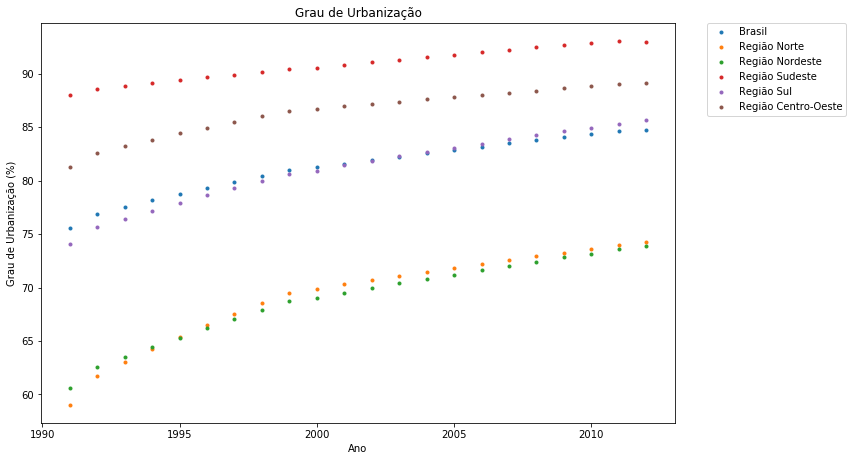

In [5]:
plt.figure(1)
plt.subplot(322)
plt.plot(grauUrb, '.')
# 'u' antes da string para podermos utilizar acentos
plt.title(u'Grau de Urbanização')
plt.xlabel('Ano')
plt.ylabel(u'Grau de Urbanização (%)')
plt.legend(grauUrb.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Pela visualização dos dados de urbanização, vemos que esse índice aumentou para todo o país, com as regiões sudeste e centro-oeste sendo desde o início mais urbanizadas que a média brasileira e a região sul ultrapassando tal média entre 2002 e 2005 (podemos obter o ano exato postreriormente caso necessário).


Agora, vamos carregar os dados de mortalidade infantil utilizando os parâmetros header e skip_footer conforme dito anteriormente:

Região  Brasil  Região Norte  Região Nordeste  Região Sudeste  Região Sul  \
1990     53.70         52.90            87.30           36.60       35.20   
1991     50.69         51.26            80.98           34.95       33.24   
1992     47.84         49.67            75.11           33.38       31.39   
1993     45.15         48.13            69.67           31.87       29.64   
1994     42.62         46.64            64.62           30.44       27.98   
1995     40.23         45.20            59.94           29.06       26.42   
1996     37.97         43.80            55.60           27.75       24.95   
1997     35.84         42.44            51.57           26.50       23.56   
1998     33.83         41.13            47.83           25.31       22.25   
1999     31.93         39.85            44.37           24.17       21.01   
2000     30.13         38.62            41.15           23.08       19.84   
2001     28.73         37.73            38.33           22.01       19.39   

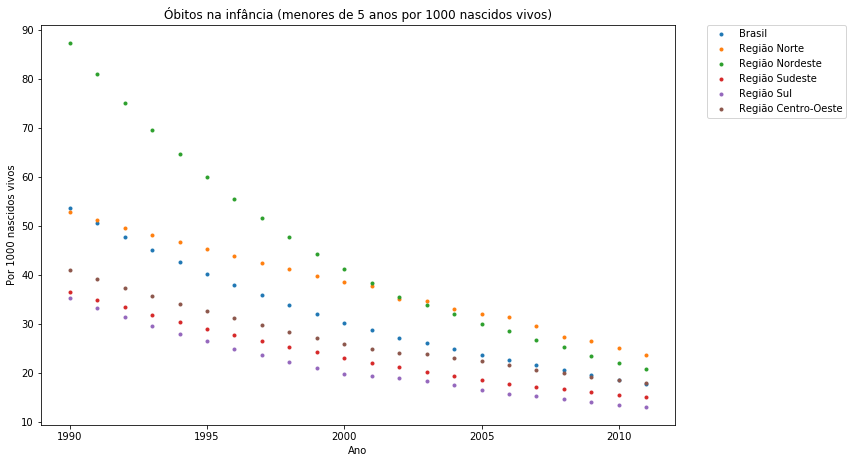

In [6]:
mortInfant = pd.read_excel(open("data/Serie_Grupo_C.xlsx", 'rb'), sheetname='C.16', header=3, index_col=0, skip_footer=7, encoding='utf-8')
mortInfant = mortInfant.transpose()
print mortInfant
print mortInfant.keys()
plt.subplot(322)
plt.plot(mortInfant, '.')
plt.title(u'Óbitos na infância (menores de 5 anos por 1000 nascidos vivos)')
plt.xlabel('Ano')
plt.ylabel('Por 1000 nascidos vivos')
plt.legend(mortInfant.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



A representação gráfica da evolução de óbitos na infância deixa claro que esse índice felizmente foi reduzido ao longo do tempo quase linearmente.

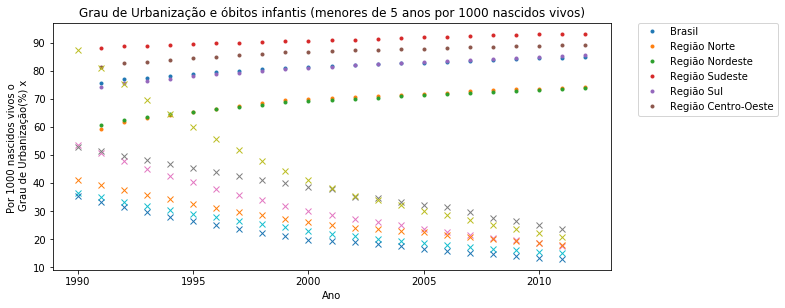

In [7]:
plt.rcParams['figure.figsize'] = [10, 10]

plt.figure(1)
plt.subplot(211)
plt.plot(grauUrb, '.')
plt.title('Grau de Urbanizacao')
plt.xlabel('Ano')
plt.ylabel('Grau de Urbanizacao (%)')

plt.subplot(211)
plt.plot(mortInfant, 'x')
plt.title(u'Grau de Urbanização e óbitos infantis (menores de 5 anos por 1000 nascidos vivos)')
plt.xlabel('Ano')
plt.ylabel(u'Por 1000 nascidos vivos o \n Grau de Urbanização(%) x')
plt.legend(grauUrb.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Visualmente parece que temos uma boa correlação entre grau de urbanização e Óbitos infantis. Para confirmar, podemos calcular o coeficiente de correlação entre as duas sequências para cada uma das regiões.

Porém antes é bom criarmos labels para nossos dataframes sem caracteres especiais (pensando bem deveria funcionar indexar utilizando u'string' mas não usar caracteres especiais é uma boa prática).

In [8]:
labelsUtf = ['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', u'Centro-Oeste']
print grauUrb.keys()
grauUrb.columns = labelsUtf
print mortInfant.keys()
mortInfant.columns = labelsUtf

Index([u'Brasil', u'Região Norte', u'Região Nordeste', u'Região Sudeste',
       u'Região Sul', u'Região Centro-Oeste'],
      dtype='object', name=u'Região')
Index([u'Brasil', u'Região Norte', u'Região Nordeste', u'Região Sudeste',
       u'Região Sul', u'Região Centro-Oeste'],
      dtype='object', name=u'Região')


Agora sim, vamos calcular a correlação entre grau de urbanização e mortalidade infantil.

In [9]:
correlGrauUrb_mortInfant = grauUrb.corrwith(mortInfant)
print correlGrauUrb_mortInfant

Brasil         -0.998757
Norte          -0.955493
Nordeste       -0.998682
Sudeste        -0.992590
Sul            -0.998229
Centro-Oeste   -0.993490
dtype: float64


Conforme observado nos gráficos, os resultados obtidos para a correlação negativa entre os parâmetros foram bastante significativos, abaixo de -0.99 com exceção da região Norte, que teve uma correlação de -0.95. Esses valores nos fornecem um embasamento estatístico para afirmar que o aumento do grau de urbanização possui um efeito inversamente proporcional na mortalidade infantil. Porém, sabemos que vários outros fatores, como maior disponibilidade de médicos, campanhas de vacinação e melhorias no saneamento também possuem papel significativo. 

Para tentar entender a evolução dessas mortes, podemos analisar óbitos por doença diarréica e infecção aguda respiratória, já que doenças diarreicas estão geralmente relacionadas à condições de saneamento, enquanto infecção aguda respiratória podem ser relacionadas à , entre outros fatores, poluição.

In [10]:
obitosDiarreia = pd.read_excel(open("data/Serie_Grupo_C.xlsx", 'rb'), sheetname='C.6', header=3, index_col=0, skip_footer=5, encoding='utf-8')
obitosDiarreia = obitosDiarreia.transpose()
obitosDiarreia.columns = labelsUtf
print obitosDiarreia
print obitosDiarreia.keys()

obitosResp = pd.read_excel(open("data/Serie_Grupo_C.xlsx", 'rb'), sheetname='C.7', header=3, index_col=0, skip_footer=5, encoding='utf-8')
obitosResp = obitosResp.transpose()
obitosResp.columns = labelsUtf
print obitosResp
print obitosResp.keys()


      Brasil  Norte  Nordeste  Sudeste  Sul  Centro-Oeste
1990    10.8   19.0      12.6      8.2  9.5           9.7
1991     9.3   14.4      12.0      6.1  8.8           9.3
1992     9.4   12.3      13.5      6.1  7.2           9.4
1993     9.4   10.7      14.2      5.9  6.9           7.9
1994     9.2   10.2      13.9      6.1  6.9           7.7
1995     8.3    9.2      13.0      5.4  5.8           6.8
1996     6.9    7.8      10.9      4.5  4.6           6.2
1997     5.6    7.1       9.2      3.2  3.8           5.2
1998     6.8    7.6      11.8      3.3  4.2           5.0
1999     5.5    5.3       9.7      2.7  3.2           4.1
2000     4.5    5.0       6.7      2.6  3.2           4.5
2001     4.4    4.9       6.7      2.5  2.5           4.2
2002     4.4    5.3       6.8      2.1  2.3           4.3
2003     4.3    4.8       6.9      2.1  2.0           3.9
2004     4.0    4.9       6.2      1.9  2.1           3.9
2005     4.1    6.2       6.5      1.7  1.7           3.5
2006     3.9  

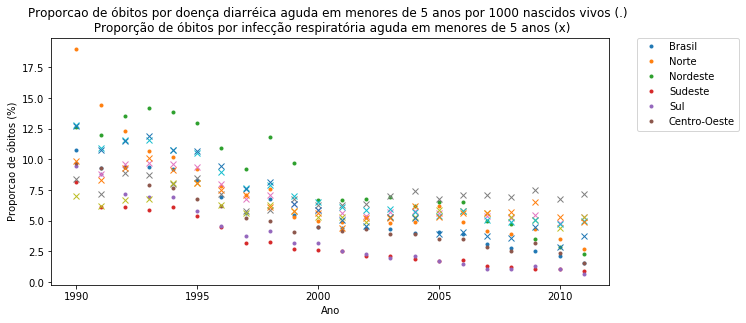

In [11]:
plt.figure(2)
plt.subplot(211)
plt.plot(obitosDiarreia, '.')
plt.title(u'Proporcao de óbitos por doença diarréica aguda em menores de 5 anos por 1000 nascidos vivos (.) \n Proporção de óbitos por infecção respiratória aguda em menores de 5 anos (x)')
plt.xlabel('Ano')

plt.subplot(211)
plt.plot(obitosResp, 'x')
#plt.title(u'Proporcao de obitos por infeccao respiratoria aguda em menores de 5 anos')
plt.xlabel('Ano')
plt.ylabel(u'Proporcao de óbitos (%)')
plt.legend(grauUrb.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

A análise do gráfico nos permite perceber que os óbitos por doenças diarréicas tiveram uma redução proporcional maior do que os por infecção respiratória aguda. Esse fato pode ser associado à melhorias já ditas anteriormente como maior acesso à médicos e tratamento e melhorias nas condições de saneamento. 

Voltando ao foco, vejamos a correlação entre óbitos por doença diarréica e taxa de urbanização:

In [12]:
correlGrauUrb_obitosDiarreia = grauUrb.corrwith(obitosDiarreia)
print correlGrauUrb_obitosDiarreia

Brasil         -0.974081
Norte          -0.978843
Nordeste       -0.928638
Sudeste        -0.954008
Sul            -0.984335
Centro-Oeste   -0.985223
dtype: float64


Os óbitos relacionados a diarréia aguda também apresentam alta correlação com o grau de urbanização, o que pode tanto ter relação com melhores condições de saneamento nas zonas urbanas quanto com proximidade de centros de atendimentos médicos possibilitando um tratamento mais rápido e efetivo. Porém, vale analisar também a mesma correlação porém com óbitos por doenças respiratórias:

In [13]:
correlGrauUrb_obitosResp = grauUrb.corrwith(obitosResp)
print correlGrauUrb_obitosResp

Brasil         -0.921371
Norte          -0.480940
Nordeste       -0.715339
Sudeste        -0.938540
Sul            -0.955361
Centro-Oeste   -0.854357
dtype: float64


Para óbitos por doenças respiratórias não temos uma correlação tão forte com grau de urbanização, conforme esperado como resultado da análise visual dos gráficos já que o grau de urbanização sempre cresceu enquanto óbitos por doenças respiratórias se manteve relativamente estável.


Outra informação importante é se há relação entre número de consultas médicas no SUS por habitante e a taxa de mortalidade, já que é de se esperar que tenha.

In [14]:
consultasSUS = pd.read_excel(open("data/Serie_Grupo_F.xlsx", 'rb'), sheetname='F.1', header=3, index_col=0, skip_footer=6, encoding='utf-8')
consultasSUS = consultasSUS.transpose()
consultasSUS.columns = labelsUtf
print consultasSUS

      Brasil  Norte  Nordeste  Sudeste   Sul  Centro-Oeste
1995    2.21   1.33      1.93     2.60  2.08          2.25
1996    2.21   1.36      2.01     2.58  1.97          2.12
1997    2.26   1.44      2.10     2.63  2.02          2.12
1998    2.21   1.41      1.95     2.60  2.00          2.16
1999    2.28   1.54      2.03     2.67  2.07          2.10
2000    2.25   1.51      2.02     2.60  2.18          2.02
2001    2.35   1.59      2.10     2.67  2.31          2.33
2002    2.45   1.74      2.21     2.79  2.29          2.48
2003    2.42   1.76      2.16     2.76  2.30          2.32
2004    2.35   1.70      2.06     2.73  2.20          2.18
2005    2.39   1.86      2.10     2.74  2.27          2.31
2006    2.42   1.85      2.18     2.73  2.32          2.36
2007    2.43   2.00      2.16     2.71  2.39          2.47
2008    2.59   2.19      2.36     2.88  2.41          2.62
2009    2.69   2.40      2.46     2.95  2.62          2.57
2010    2.71   2.22      2.39     3.03  2.75          2.

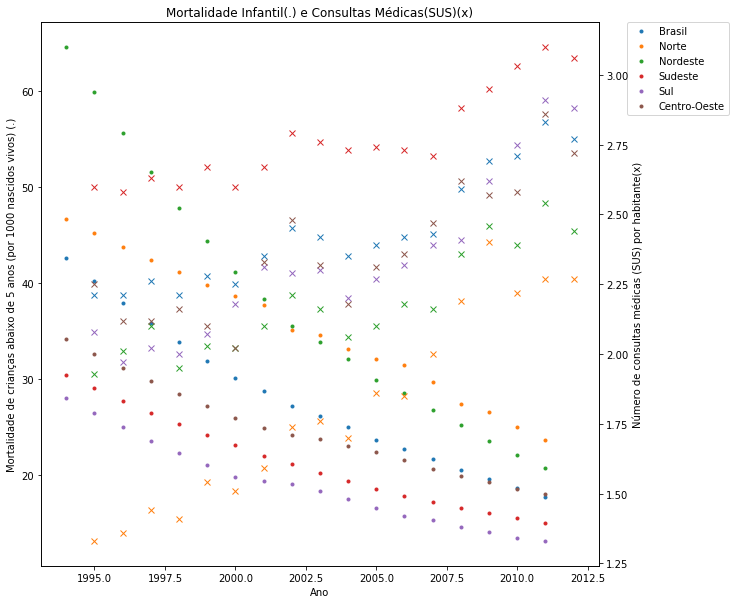

In [15]:
#plt.subplot(211)
fig, ax1 = plt.subplots()
ax1.plot(mortInfant[4:], '.')
ax1.set_title(u'Mortalidade Infantil(.) e Consultas Médicas(SUS)(x)')
ax1.set_xlabel('Ano')
ax1.set_ylabel(u'Mortalidade de crianças abaixo de 5 anos (por 1000 nascidos vivos) (.)')
ax2 = ax1.twinx()
ax2.plot(consultasSUS, 'x')
ax2.set_ylabel(u'Número de consultas médicas (SUS) por habitante(x)')
ax1.legend(grauUrb.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Pela visualização fica claro que conforme o número de consultas na rede pública cresce, a mortalidade decresce, conforme esperado. Vejamos a correlação:

In [16]:
correlGrauUrb_consultasSUS = grauUrb[4:].corrwith(consultasSUS)
print correlGrauUrb_consultasSUS

Brasil          0.900564
Norte           0.924385
Nordeste        0.855389
Sudeste         0.891176
Sul             0.892929
Centro-Oeste    0.783346
dtype: float64


Pela correlação, confirmamos que existe uma relação inversa clara entre consultas na rede oública e mortalidade de crianças, porém, essa correlação é mais fraca do que a entre mortalidade e grau de urbanização.

Portanto, temos argumentos para justificar uma relação forte entre taxa de urbanização e redução da mortalidade de crianças abaixo de 5 anos. Podemos partir agora para refinar nossa visualização.

## Refinamento da Visualização

Agora que sabemos como se comportam as variáveis para as diferentes regiões, é seguro utilizar os dados médios do Brasil na visualização final para expressar a mensagem de forma mais ampla sem perder precisão. Vejamos como fica a visualização:

(10, 90)

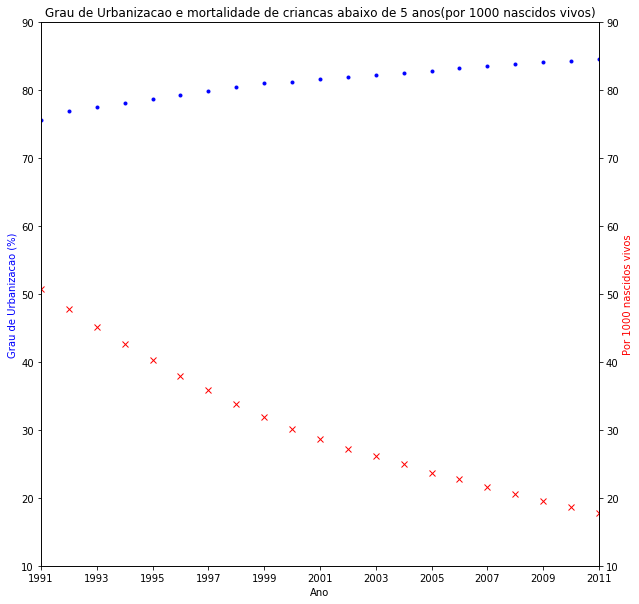

In [17]:
grauUrbBr = grauUrb['Brasil']
mortInfantBr = mortInfant['Brasil']

xPlotLim = (1991, 2011)
yPlotLim = (10, 90)
fig, ax1 = plt.subplots()
ax1.set_title('Grau de Urbanizacao e mortalidade de criancas abaixo de 5 anos(por 1000 nascidos vivos)')
ax1.xaxis.set_ticks(np.arange(1991, 2012, 2))
ax2 = ax1.twinx()

ax1.plot(grauUrbBr, 'b.')

ax1.set_xlabel('Ano')
ax1.set_ylabel('Grau de Urbanizacao (%)', color='b')
ax1.set_xlim(xPlotLim)
ax1.set_ylim(yPlotLim)
#plt.subplot(211)
ax2.plot(mortInfantBr, 'rx')
#ax2.title('Obitos infantis (menores de 1 ano por 1000 nascidos vivos)')
#ax2.xlabel('Ano')
ax2.set_ylabel('Por 1000 nascidos vivos', color='r')
ax2.set_xlim(xPlotLim)
ax2.set_ylim(yPlotLim)


Apesar da visualização passar uma mensagem clara e estar agradável, ela não me convence acerca da forte relação entre os parâmetros. Vejamos se um gráfico de barras fica melhor:

[ 1991.  1993.  1995.  1997.  1999.  2001.  2003.  2005.  2007.  2009.
  2011.]


(array([ 4.,  3.,  3.,  2.,  2.,  1.,  2.,  1.,  1.,  2.]),
 array([ 17.71 ,  21.008,  24.306,  27.604,  30.902,  34.2  ,  37.498,
         40.796,  44.094,  47.392,  50.69 ]),
 <a list of 10 Patch objects>)

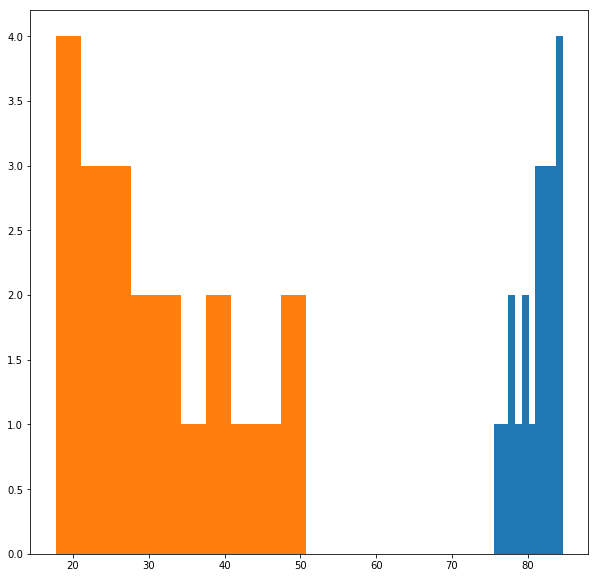

In [18]:
#print grauUrbBr[:-1], mortInfantBr[1:]
bins = np.linspace(1991, 2011, num=11)
print bins
plt.hist(grauUrbBr[:-1])
plt.hist( mortInfantBr[1:])

Mesmo com o gráfico de barras não me convenci mas acredito que seja porque não aceito a ideia de que urbanização é o que teve maior influênca na taxa de mortalidade. A série histórica inicia em 1990 pois é nesse ano em que o SUS foi criado. Será que a influência do SUS não teve um impacto maior na saúde? Será possível elencar como os diversos fatores compreendidos por essa base de dados influenciam na redução da mortalidade? É hora de refazer a pergunta!

## Exploração - Pergunta Final: Quais fatores contribuem para a redução da taxa de mortalidade de crianças abaixo de 5 anos?

Vamos começar explorando os dados de gasto de saúde proporcinal ao PIB:

Itens de gasto  Total
1995             1.79
1996             1.53
1997             1.67
1998             1.58
1999             1.69
2000             1.70
2001             1.71
2002             1.68
2003             1.58
2004             1.62
2005             1.59
2006             1.68
2007             1.66
2008             1.63
2009             1.82
2010             1.68
2011             1.78
2012             1.86
Index([u'Total'], dtype='object', name=u'Itens de gasto')


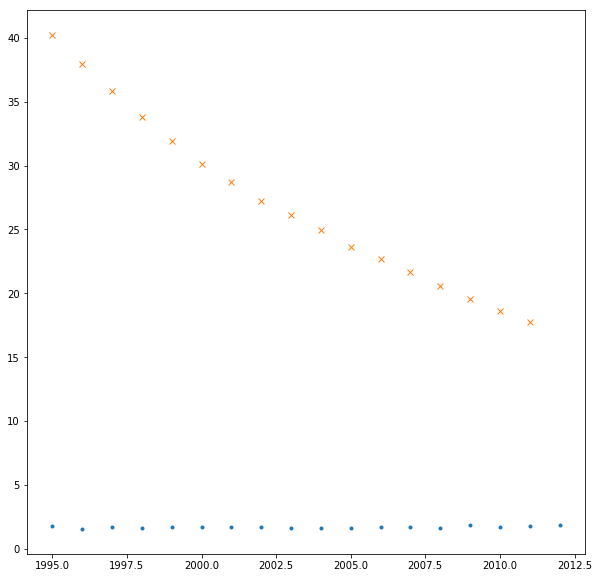

In [19]:
gastoSaudePropPIB = pd.read_excel(open("data/Serie_Grupo_E.xlsx", 'rb'), sheetname='E.7', header=3, index_col=0, skip_footer=14, encoding='utf-8')
gastoSaudePropPIB = gastoSaudePropPIB.transpose()
#gastoSaudePerCapita.columns = labelsUtf
print gastoSaudePropPIB
print gastoSaudePropPIB.keys()
plt.plot(gastoSaudePropPIB, '.')
plt.plot(mortInfantBr[5:], 'x')

Aparentemente, gastos com saúde como proporção do PIB não tem muita relação com a redução da taxa de óbitos, o que pode ser compreendido pois por mais que a relação se mantenha constante, o PIB aumentou durante o tempo estudado, o que faz com que o valor percentual não mude mas o absoluto sim. Portanto, esse parâmetro não é tão interessante sem ponderação adicional, embora o gasto per capita com ações e serviços públicos de saúde em valores brutos possa ser:

2000    204.89
2001    238.91
2002    272.14
2003    306.80
2004    365.84
2005    418.59
2006    467.38
2007    510.76
2008    591.22
2009    653.11
2010    725.83
2011    830.14
2012    903.52
Name: Total, dtype: float64
Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012],
           dtype='int64')


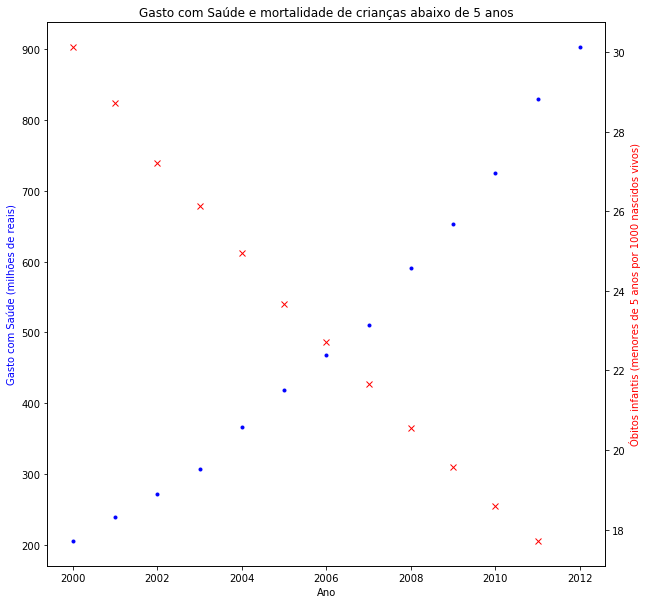

In [20]:
gastoSaudeBruto = pd.read_excel(open("data/Serie_Grupo_E.xlsx", 'rb'), sheetname='E.6.2', header=3, index_col=0, skip_footer=34, encoding='utf-8')
gastoSaudeBruto = gastoSaudeBruto.transpose()
gastoSaudeBruto = gastoSaudeBruto['Total']
#gastoSaudePerCapita.columns = labelsUtf
print gastoSaudeBruto
print gastoSaudeBruto.keys()

fig, ax1 = plt.subplots()
ax1.set_title(u'Gasto com Saúde e mortalidade de crianças abaixo de 5 anos')
ax2 = ax1.twinx()

ax1.set_xlabel('Ano')
ax1.set_ylabel(u'Gasto com Saúde (milhões de reais)', color='b')
ax2.set_ylabel(u'Óbitos infantis (menores de 5 anos por 1000 nascidos vivos)', color='r')

ax1.plot(gastoSaudeBruto, 'b.')
ax2.plot(mortInfantBr[10:], 'rx')


Agora sim vemos o que esperávamos. Será que matematicamente temos uma relação tão forte quanto visualmente?

In [21]:
correlmortInfant_gastoSaudeBruto = mortInfant[10:].corrwith(gastoSaudeBruto)
print correlmortInfant_gastoSaudeBruto

Brasil         -0.978500
Norte          -0.988723
Nordeste       -0.971676
Sudeste        -0.966249
Sul            -0.979933
Centro-Oeste   -0.987439
dtype: float64


Como esperado, temos uma forte correlação ente gasto bruto com saúde e queda nos óbitos infantis.
Conforme dito anteriormente, outro fator com forte influência deve ser gasto federal com saneamento básico, vamos abrir os dados e consultar se essa suposição se confirma.

Ano
1995     237
1996     679
1997    1130
1998    1715
1999    1045
2000    1338
2001    2947
2002    1308
2003     580
2004    1064
2005    1705
2006    2225
2007    4762
2008    4964
2009    6530
2010    4994
Name: Gasto federal com saneamento, dtype: int64
Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010],
           dtype='int64', name=u'Ano')


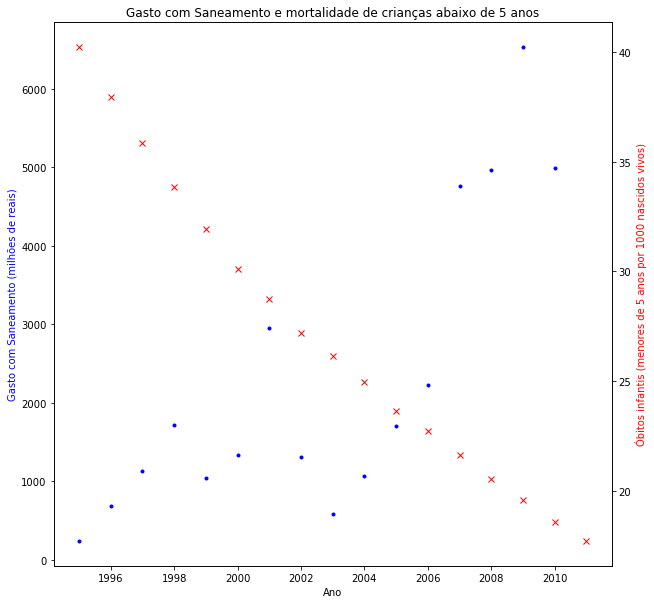

In [22]:
gastoFedSaneamento = pd.read_excel(open("data/Serie_Grupo_E.xlsx", 'rb'), sheetname='E.14', header=3, index_col=0, skip_footer=8, encoding='utf-8')
gastoFedSaneamento = gastoFedSaneamento['Gasto federal com saneamento']
#leitosPorHab = leitosPorHab.transpose()
#gastoSaudePerCapita.columns = labelsUtf
print gastoFedSaneamento
print gastoFedSaneamento.keys()

fig, ax1 = plt.subplots()
ax1.set_title(u'Gasto com Saneamento e mortalidade de crianças abaixo de 5 anos')
#ax1.xaxis.set_ticks(np.arange(1991, 2012, 2))
ax2 = ax1.twinx()

ax1.set_xlabel('Ano')
ax1.set_ylabel(u'Gasto com Saneamento (milhões de reais)', color='b')
ax2.set_ylabel(u'Óbitos infantis (menores de 5 anos por 1000 nascidos vivos)', color='r')

ax1.plot(gastoFedSaneamento, 'b.')
ax2.plot(mortInfantBr[5:], 'rx')

Podemos ver que os gastos com saneamento possuem relação inversa aos óbitos infantis, apesar de não ser tão forte. Vejamos o que os números nos informam:

In [23]:
correlmortInfant_gastoFedSaneamento = mortInfant[4:].corrwith(gastoFedSaneamento)
print correlmortInfant_gastoFedSaneamento

Brasil         -0.751654
Norte          -0.803677
Nordeste       -0.732468
Sudeste        -0.749096
Sul            -0.765277
Centro-Oeste   -0.769487
dtype: float64


Analisando a correlação entre mortalidade de crianças abaixo de 5 anos e gasto federal com saneamento, percebemos que existe uma correlação, apesar de não ser tão forte quanto as outras vistas anteriormente.
Outro fator interessante para consulta é o número de procedimentos diagnósticos efetuados por consulta médica no SUS.

1995    0.50
1996    0.52
1997    0.54
1998    0.58
1999    0.59
2000    0.64
2001    0.66
2002    0.67
2003    0.70
2004    0.74
2005    0.78
2006    0.84
2007    0.88
2008    0.91
2009    0.96
2010    1.06
2011    1.06
2012    1.16
Name: Brasil, dtype: float64
Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012],
           dtype='int64')


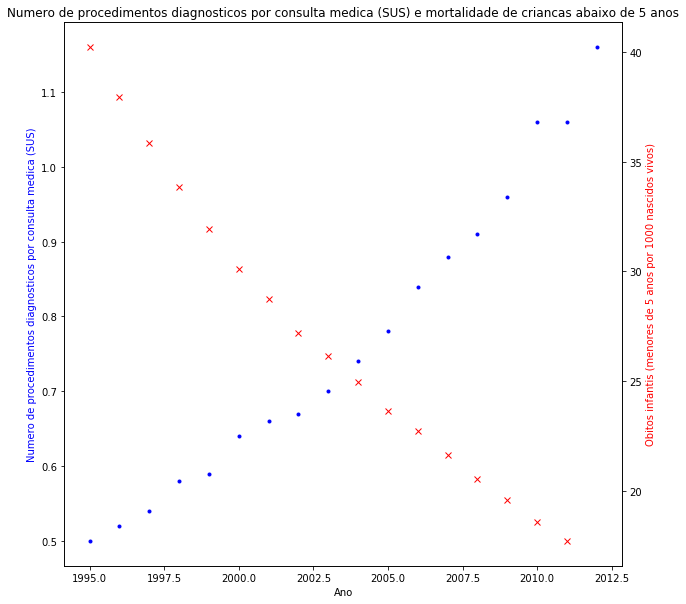

In [24]:
diagConsulta = pd.read_excel(open("data/Serie_Grupo_F.xlsx", 'rb'), sheetname='F.2', header=3, index_col=0, skip_footer=18, encoding='utf-8')

diagConsulta = diagConsulta.transpose()
diagConsulta = diagConsulta['Brasil']
#gastoSaudePerCapita.columns = labelsUtf
print diagConsulta
print diagConsulta.keys()

fig, ax1 = plt.subplots()
ax1.set_title('Numero de procedimentos diagnosticos por consulta medica (SUS) e mortalidade de criancas abaixo de 5 anos')
#ax1.xaxis.set_ticks(np.arange(1991, 2012, 2))
ax2 = ax1.twinx()

ax1.set_xlabel('Ano')
ax1.set_ylabel('Numero de procedimentos diagnosticos por consulta medica (SUS)', color='b')
ax2.set_ylabel('Obitos infantis (menores de 5 anos por 1000 nascidos vivos)', color='r')

ax1.plot(diagConsulta, 'b.')
ax2.plot(mortInfantBr[5:], 'rx')

Dessa vez podemos ver uma relação forte entre os dois parâmetros, já matematicamente temos:

In [25]:
correlmortInfant_consultasSUS = mortInfant[4:].corrwith(consultasSUS)
correlmortInfant_diagConsulta = mortInfant[4:].corrwith(diagConsulta)
print correlmortInfant_diagConsulta


Brasil         -0.954438
Norte          -0.985087
Nordeste       -0.940696
Sudeste        -0.954617
Sul            -0.955172
Centro-Oeste   -0.957896
dtype: float64


Ou seja, realmente podemos perceber uma grande relação entre mortalidade de crianças abixo de 5 anos e e número de procedimentos diagnosticos realizados por consulta no Sistema Único de Saúde.
Com isso, já pudemos elencar diversos fatores que contribuem para a redução dos óbitos infantis.

## Como estamos até agora?

No início desejava encontrar uma relação única para um fenômeno que claramente possui diversos fatores influenciadores, como novas vacinas, mudanças em formas de atuação de profissionais de saúde, entre outras[1]. 
Repensando melhor a situação, creio que um gráfico que mostre correlação entre mortalidade infantil e os diversos parâmetros estudados até agora seja mais elucidativo. Vejamos como fica:

In [26]:
correlmortInfant_obitosResp = mortInfant.corrwith(obitosResp)
correlmortInfant_obitosDiarreia = mortInfant.corrwith(obitosDiarreia)

correlVec = [correlmortInfant_consultasSUS['Brasil'], correlmortInfant_diagConsulta['Brasil'], 
             correlmortInfant_gastoFedSaneamento['Brasil'], correlGrauUrb_mortInfant['Brasil'], 
             correlmortInfant_gastoSaudeBruto['Brasil'],
             correlmortInfant_obitosDiarreia['Brasil'], correlmortInfant_obitosResp['Brasil']]
print correlVec

[-0.87559880251913047, -0.95443800422247838, -0.75165423606647819, -0.99875656298687432, -0.97850013181257878, 0.98217259008863378, 0.93217737562696867]


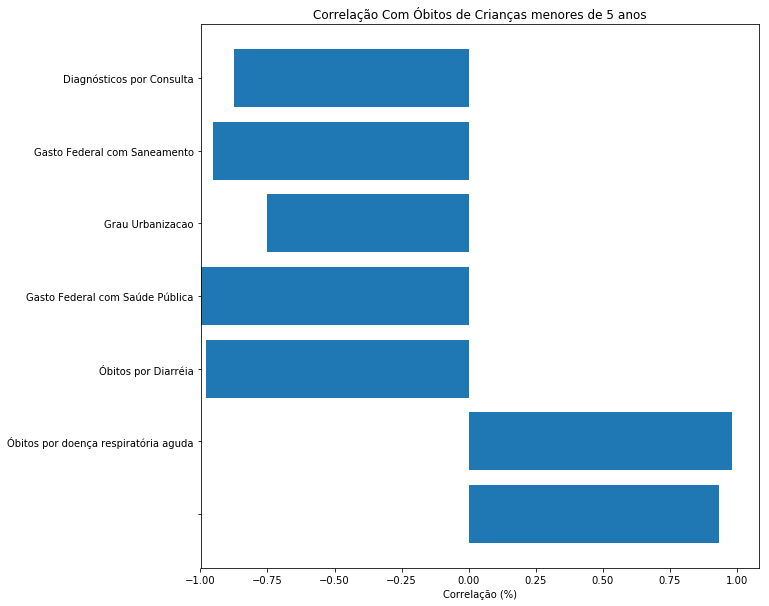

In [27]:
labels = (u'Consultas SUS', u'Diagnósticos por Consulta', 
          u'Gasto Federal com Saneamento', u'Grau Urbanizacao', 
          u'Gasto Federal com Saúde Pública',
          u'Óbitos por Diarréia', u'Óbitos por doença respiratória aguda')
y_pos = np.arange(len(labels))
fig, ax = plt.subplots()



ax.barh(y_pos, correlVec)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel(u'Correlação (%)')
ax.set_title(u'Correlação Com Óbitos de Crianças menores de 5 anos')



Gostei dessa visualização, porém creio que ela possa gerar confusão por conter valores positivos e negativos indicando correlação direta e inversa. Uma possível solução é utilizar apenas valores positivos e indicar proporcionalidade inversa por meio da cor.

### Refinamento da Visualização Final

In [28]:
#Tratamento para deixar todos os valores positivos e criar vetor de cores
correlVecPos = []
correlVecSign = []
for element in correlVec:
    if element < 0:
        recordedElement = element * (-1)
        correlVecSign.append('black')
    else:
        recordedElement = element
        correlVecSign.append('grey')
    correlVecPos.append(recordedElement)

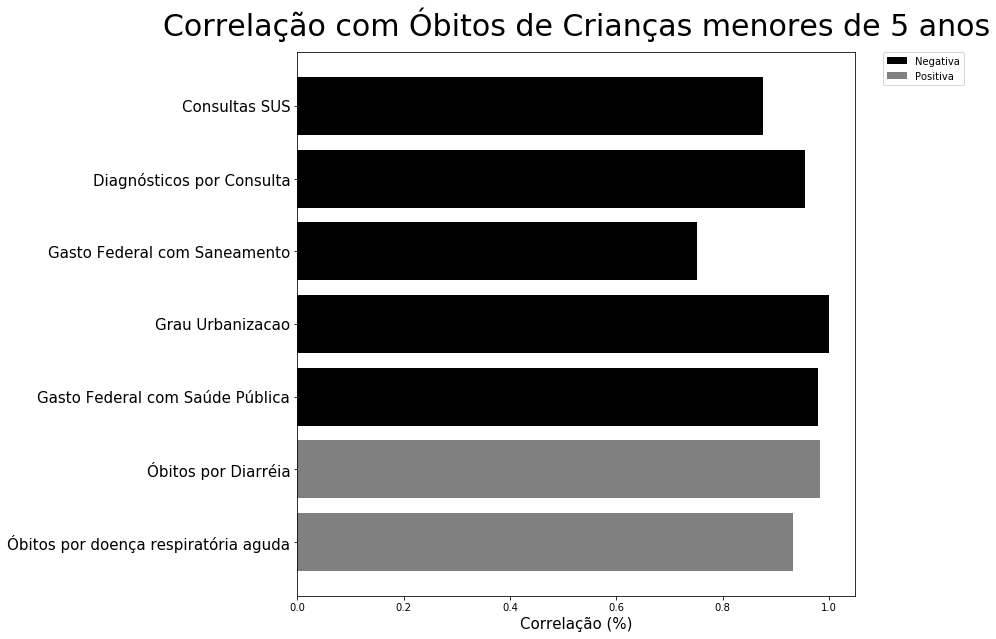

In [29]:
fig, ax = plt.subplots()

#slicing the arrays to plot positive and negative values separately is ugly but was the only workaround for the subtitle I could think now
ax.barh(y_pos[:5], correlVecPos[:5], color=correlVecSign[:5])
ax.barh(y_pos[5:], correlVecPos[5:], color=correlVecSign[5:])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax.set_yticklabels(labels, size=15)
ax.invert_yaxis()
ax.set_xlabel(u'Correlação (%)', size=15)
ax.set_title(u'Correlação com Óbitos de Crianças menores de 5 anos', size=30, y=1.02)
ax.legend(['Negativa', 'Positiva'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Gostei dessa visulização, porém repensando seu conteúdo, não faz sentido manter óbitos por diarréia e por doença respiratória já que essas correlações foram calculadas apenas para explicar outras possíveis relações. Retirando esses dois parâmetros, ficamos apenas com corelações negativas, o que é interessante pois podemos mudar o título do gráfico para algo mais significativo para o público geral. Além disso, podemos utilizar o eixo X para passar informações sobre o significado dos resultados ecolocar nas barras os valores reais. Por fim, podemos mostrar os valores em porcentagem para facilitar a compreesão geral.

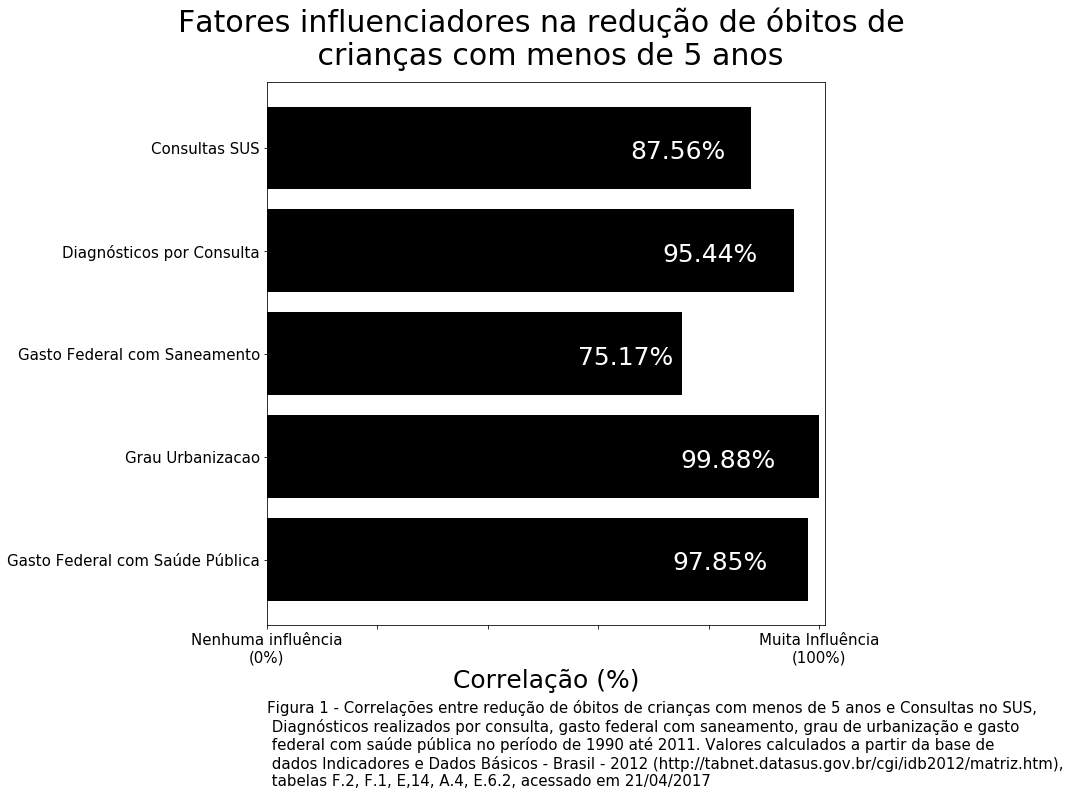

In [30]:
fig, ax = plt.subplots()

ax.barh(y_pos[:5], correlVecPos[:5], color=correlVecSign[:5])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(labels, size=15)
ax.invert_yaxis()
ax.set_xbound([0, 1.01])
#Com xticklabels espero deixar o gráfico mais simples para leigos indicando nos eixos o significado dos mesmo
ax.set_xticklabels([u'Nenhuma influência\n(0%)','' ,'' ,'' ,'' , u'Muita Influência\n(100%)'], size=15)
ax.set_xlabel(u'Correlação (%)', size=25)
ax.set_title(u'Fatores influenciadores na redução de óbitos de \n crianças com menos de 5 anos', size=30, y=1.02)

patches = ax.patches
currentBar = 0
for patch in patches:
    ax.text((patch.get_x() + patch.get_width()*3/4), (patch.get_y() + (patch.get_height()/2 + .1)),
            "{0:.2f}%".format(correlVecPos[currentBar]*100), color = 'white', size=25 )
    currentBar += 1

ax.text(0, 6.2, u"Figura 1 - Correlações entre redução de óbitos de crianças com menos de 5 anos e Consultas no SUS, \n Diagnósticos realizados por consulta, gasto federal com saneamento, grau de urbanização e gasto \n federal com saúde pública no período de 1990 até 2011. Valores calculados a partir da base de \n dados Indicadores e Dados Básicos - Brasil - 2012 (http://tabnet.datasus.gov.br/cgi/idb2012/matriz.htm),\n tabelas F.2, F.1, E,14, A.4, E.6.2, acessado em 21/04/2017 ",  size=15)


# Conclusão

O processo de investigação foi bastante interessante pois permitiu o contato com diversos indicadores que comprovaram muitas das informações aprendidas nas aulas de geografia do passado. Como resultado desse trabalho, foi possível perceber que a taxa de óbitos de crianças com menos de 5 anos está em queda desde a criação do Sistema Único de Saúde brasileiro e tem relações fortes com grau de urbanização, consultas no sistema público de saúde realizadas, exames diagnósticos realizados nas consultas, melhoras no saneamento e investimentos em saúde pública. Analisando apenas a relação entre a redução da mortalidade e consultas e diagnóstico e saneamento, é possível concluir que fatores ligados à prevenção de doenças proporcionada pelo SUS geram bons resultados. Por fim, a visualização criada permite o entendimento desses dados de maneira clara e concisa, com um gráfico simples, limpo e com um equilíbrio entre quantidade de informações e capacidade de transmitir a mensagem desejada não apenas para profissionais da área, mas sim para a população geral.

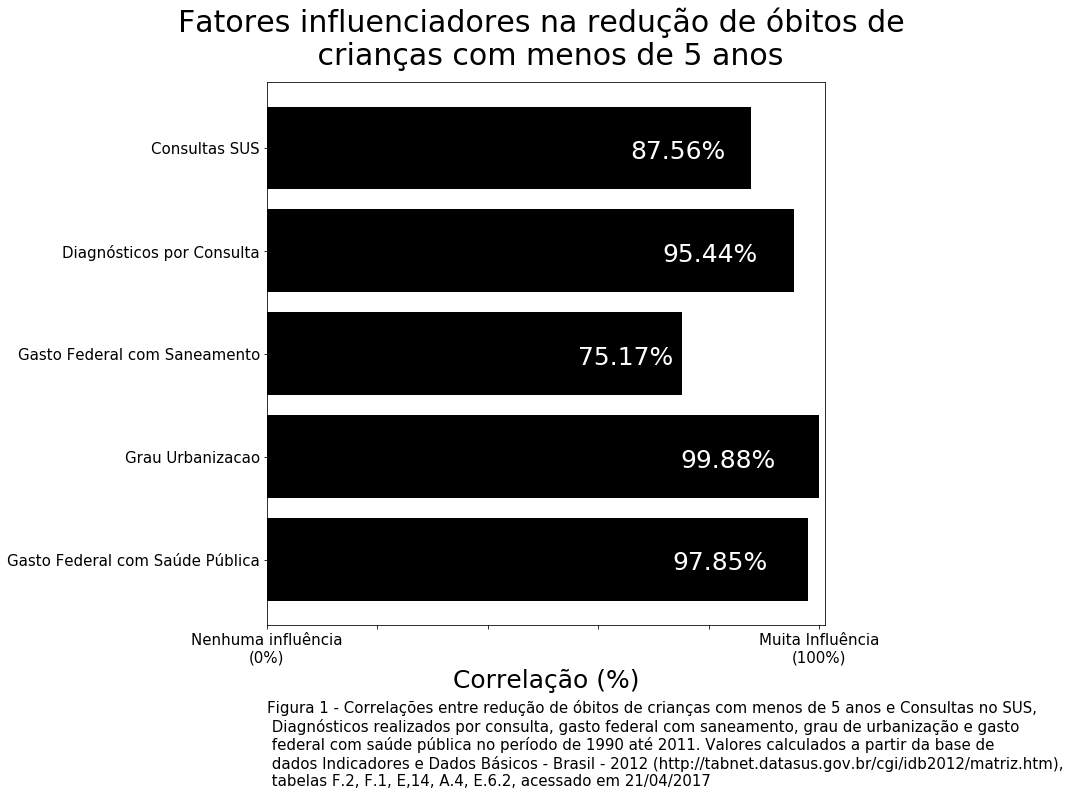

In [31]:
fig, ax = plt.subplots()

ax.barh(y_pos[:5], correlVecPos[:5], color=correlVecSign[:5])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(labels, size=15)
ax.invert_yaxis()
ax.set_xbound([0, 1.01])
#Com xticklabels espero deixar o gráfico mais simples para leigos indicando nos eixos o significado dos mesmo
ax.set_xticklabels([u'Nenhuma influência\n(0%)','' ,'' ,'' ,'' , u'Muita Influência\n(100%)'], size=15)
ax.set_xlabel(u'Correlação (%)', size=25)
ax.set_title(u'Fatores influenciadores na redução de óbitos de \n crianças com menos de 5 anos', size=30, y=1.02)

patches = ax.patches
currentBar = 0
for patch in patches:
    ax.text((patch.get_x() + patch.get_width()*3/4), (patch.get_y() + (patch.get_height()/2 + .1)),
            "{0:.2f}%".format(correlVecPos[currentBar]*100), color = 'white', size=25 )
    currentBar += 1

ax.text(0, 6.2, u"Figura 1 - Correlações entre redução de óbitos de crianças com menos de 5 anos e Consultas no SUS, \n Diagnósticos realizados por consulta, gasto federal com saneamento, grau de urbanização e gasto \n federal com saúde pública no período de 1990 até 2011. Valores calculados a partir da base de \n dados Indicadores e Dados Básicos - Brasil - 2012 (http://tabnet.datasus.gov.br/cgi/idb2012/matriz.htm),\n tabelas F.2, F.1, E,14, A.4, E.6.2, acessado em 21/04/2017 ",  size=15)


# Trabalhos Futuros
Como continuação dessa exploração, podemos citar os seguintes trabalhos futuros:

    - Inclusão de outras bases de dados nessa pesquisa para embasar melhor cada uma das relações;
    - Distribuição de consultas médicas por localização no Brasil: dessa forma, seria possível analisar se existe acesso à médicos nas zonas rurais e assim verificar se a correlação entre grau de urbanização e redução na mortalidade é realmente tão forte quanto demonstrado;
# Referências
[1] "Portal Brasil - Brasil está acima da média mundial na redução da mortalidade infantil, diz ONU" - Acessado em 22/04/2017 Link:http://www.brasil.gov.br/cidadania-e-justica/2015/09/brasil-esta-acima-da-media-mundial-na-reducao-da-mortalidade-infantil-diz-onu
[2] "Indicadores e Dados Básicos - Brasil - 2012", Tabelas F.2, F.1, E,14, A.4, E.6.2, Acessado em 21/04/2017. Link: http://tabnet.datasus.gov.br/cgi/idb2012/matriz.htm